In [1]:
import os
import sys
code_dir = '/afs/inf.ed.ac.uk/user/s17/s1771906/masters-project/ben-rhodes-masters-project/proposal/code'
code_dir_2 = '/home/ben/ben-rhodes-masters-project/proposal/code'
code_dir_3 = '/afs/inf.ed.ac.uk/user/s17/s1771906/masters-project/ben-rhodes-masters-project/proposal/code/neural_network'
code_dirs = [code_dir, code_dir_2, code_dir_3]
for code_dir in code_dirs:
    if code_dir not in sys.path:
        sys.path.append(code_dir)

In [2]:
import numpy as np

# my code
from distribution import MissingDataProductOfTruncNormsPosterior, MissingDataProductOfTruncNormNoise
from fully_observed_models import MixtureOfTwoGaussians
from latent_variable_model import MissingDataUnnormalisedTruncNorm
from nce_optimiser import NCEOptimiser
from utils import *
from vnce_optimiser import VemOptimiser, SgdEmStep, MonteCarloVnceLoss

from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import random as rnd
from scipy.optimize import newton_krylov
from scipy.stats import norm, multivariate_normal
from sklearn.neighbors import KernelDensity as kd

%matplotlib inline
rc('lines', linewidth=1)
rc('font', size=10)
rc('legend', fontsize=10)

In [116]:
noise_mean = np.array([3, 3], dtype=float)
noise_chol = np.array([3, 3], dtype=float)

scaling_param = np.array([0], dtype=float)
model_mean = np.array([3, 3], dtype=float)
model_chol = np.diag(np.array([3., 3.]))

In [117]:
noise = MissingDataProductOfTruncNormNoise(noise_mean, noise_chol)
model = MissingDataUnnormalisedTruncNorm(scaling_param, model_mean, model_chol)

In [118]:
noise_samples = noise.sample(100000)
model_samples = model.sample(100000)

sampling from the model...
total num samples from model accepted: 100000
finished sampling!


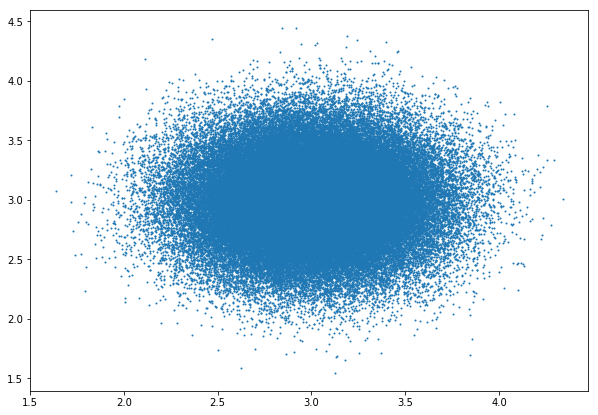

In [119]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(noise_samples[:, 0], noise_samples[:, 1], s=1)

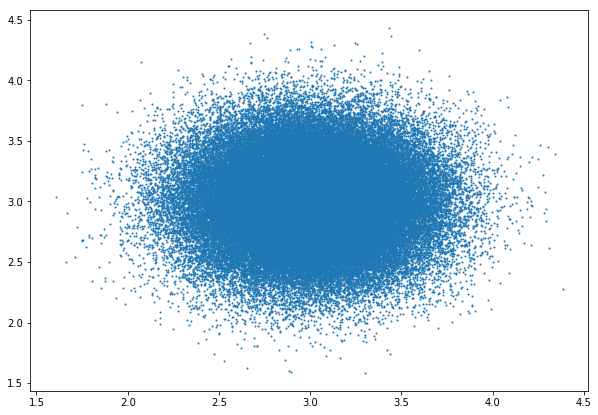

In [120]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(model_samples[:, 0], model_samples[:, 1], s=1)

In [110]:
learnt_theta = np.array([0, 0.82559534,  0.58946082,  np.exp(0.8153075),  -1.98863904, np.exp(-0.9747391)])

In [111]:
model.theta = learnt_theta

In [112]:
learnt_model_samples = model.sample(100000)

sampling from the model...
total num samples from model accepted: 100000
finished sampling!


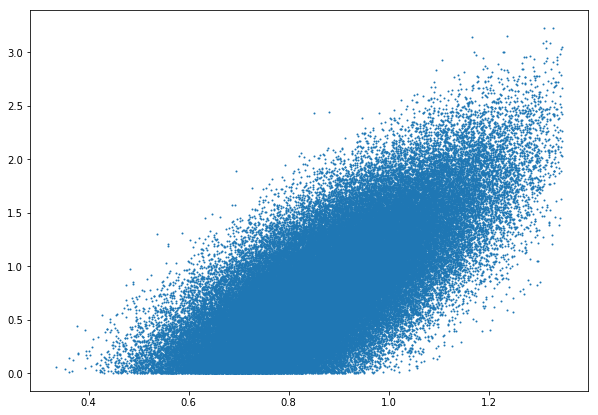

In [113]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(learnt_model_samples[:, 0], learnt_model_samples[:, 1], s=1)